# Single Cell RNA-sec

In [15]:
import warnings
warnings.filterwarnings("ignore")

import sys
sys.path.append('/Users/dmitrys/anaconda2/lib/python2.7/site-packages')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy
%matplotlib inline

In [2]:
! ls

Bioconductor.R            Papers                    filtered_gene_bc_matrices
CP-Group5.pdf             SingleCell.R              genes_tsne.csv
GRCh38                    SingleCellRNA-sec.ipynb   main.txt
JackStrawPlot.png         TSNE.jpg                  singleCell.Robj
MARKERS.csv               column_genes.csv          Описание.docx
PCA_sc3.png               consensus.png
PCElbowPlot.png           consensus2.png


In [97]:
def commit():
    !git add SingleCellRNA-sec.ipynb
    !git commit -m "single cell"
    !git push -u origin master
commit()

[master a0ca5b8] single cell
 1 file changed, 714 insertions(+), 157 deletions(-)
Counting objects: 4, done.
Delta compression using up to 4 threads.
Compressing objects: 100% (4/4), done.
Writing objects: 100% (4/4), 3.70 KiB | 0 bytes/s, done.
Total 4 (delta 2), reused 0 (delta 0)
remote: Resolving deltas: 100% (2/2), completed with 2 local objects.
To https://github.com/DmitrySerg/Bioinformatics.git
   a72c81d..a0ca5b8  master -> master
Branch master set up to track remote branch master from origin.


In [8]:
genes = pd.read_csv('GRCh38/genes.tsv', sep='\t', header=None)
barcodes = pd.read_csv('GRCh38/barcodes.tsv', sep='\t', header=None)

In [9]:
genes_tsne = pd.read_csv('MARKERS.csv', sep=' ')

In [11]:
genes.head()

,0,1
0,ENSG00000243485,RP11-34P13.3
1,ENSG00000237613,FAM138A
2,ENSG00000186092,OR4F5
3,ENSG00000238009,RP11-34P13.7
4,ENSG00000239945,RP11-34P13.8


In [10]:
genes_tsne.head()

,p_val,avg_diff,pct.1,pct.2,cluster,gene
LDHB,0.000000e+00,1.074780,0.946,0.559,0,LDHB
TRAC,0.000000e+00,0.922830,0.949,0.395,0,TRAC
CD3D,1.521852e-296,0.671165,0.912,0.371,0,CD3D
CD3E,4.021670e-258,0.737082,0.883,0.362,0,CD3E
LEF1,9.188565e-254,1.004448,0.554,0.067,0,LEF1


In [7]:
for i in genes_tsne.cluster.unique():
    genes_tsne[genes_tsne.cluster==i].reset_index(drop=True)["gene"]\
        .to_csv("genes_cluster_{}.csv".format(i), index=False, sep='\n')

In [40]:
from scipy.io import mminfo,mmread
mminfo('GRCh38/matrix.mtx')

(33694, 4340, 5727695, 'coordinate', 'integer', 'general')

In [41]:
expression = scipy.io.mmread('GRCh38/matrix.mtx').todense()

In [45]:
expression = pd.DataFrame(expression)

In [47]:
expression.shape, genes.shape, barcodes.shape

((33694, 4340), (33694, 2), (4340, 1))

In [52]:
expression.index = genes[1].values

In [54]:
expression.columns = barcodes[0].values

In [189]:
expression.head(5)

,AAACCTGAGAAGGCCT-1,AAACCTGAGACAGACC-1,AAACCTGAGATAGTCA-1,AAACCTGAGCGCCTCA-1,AAACCTGAGGCATGGT-1,AAACCTGCAAGGTTCT-1,AAACCTGCAGGATTGG-1,AAACCTGCAGGCGATA-1,AAACCTGCATCCCATC-1,AAACCTGCATGAAGTA-1,...,TTTGGTTCACTTAAGC-1,TTTGGTTCAGGACGTA-1,TTTGGTTCATGCCTAA-1,TTTGGTTCATTGGCGC-1,TTTGGTTGTTATCACG-1,TTTGGTTTCGCTAGCG-1,TTTGTCACACTTAACG-1,TTTGTCACAGGTCCAC-1,TTTGTCAGTTAAGACA-1,TTTGTCATCCCAAGAT-1
RP11-34P13.3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
FAM138A,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
OR4F5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
RP11-34P13.7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
RP11-34P13.8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [190]:
DATA = genes_tsne.join(expression)

In [192]:
DATA.fillna(0, inplace=True)

In [193]:
DATA.head()

,p_val,avg_diff,pct.1,pct.2,cluster,gene,AAACCTGAGAAGGCCT-1,AAACCTGAGACAGACC-1,AAACCTGAGATAGTCA-1,AAACCTGAGCGCCTCA-1,...,TTTGGTTCACTTAAGC-1,TTTGGTTCAGGACGTA-1,TTTGGTTCATGCCTAA-1,TTTGGTTCATTGGCGC-1,TTTGGTTGTTATCACG-1,TTTGGTTTCGCTAGCG-1,TTTGTCACACTTAACG-1,TTTGTCACAGGTCCAC-1,TTTGTCAGTTAAGACA-1,TTTGTCATCCCAAGAT-1
A1BG,2.846924e-11,0.653947,0.719,0.167,5,A1BG,0.0,0.0,0.0,0.0,...,0.0,2.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
AAK1,7.539451e-74,0.472886,0.544,0.252,0,AAK1,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,1.0,5.0,0.0,0.0
AAMDC,1.590478e-11,0.301346,0.312,0.038,5,AAMDC,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
ABHD15,8.828331e-14,0.585090,0.438,0.024,5,ABHD15,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
ABHD17A1,1.654303e-29,0.463202,0.406,0.190,3,ABHD17A,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [349]:
DATA = DATA[DATA.cluster!=5]

In [350]:
normal = genes_tsne.cluster.value_counts()
normal = normal/sum(normal)
#normal = dict(normal)

In [351]:
normal+1

5    1.351256
4    1.239403
1    1.215463
3    1.080455
2    1.074568
0    1.038854
Name: cluster, dtype: float64

In [352]:
def getCluster(cell):
    normalize=False
    grp = DATA[[cell, "cluster"]][DATA[cell]!=0].groupby('cluster').sum()
    
    if normalize:
        grp = grp.join(1 - normal)
        cluster = np.argmax(grp[cell] * grp['cluster'])
    else:
        cluster = np.argmax(grp[cell])
    return cluster

In [353]:
getCluster(cell)

1

In [354]:
FINAL = expression.T

In [355]:
FINAL.head()

,RP11-34P13.3,FAM138A,OR4F5,RP11-34P13.7,RP11-34P13.8,RP11-34P13.14,RP11-34P13.9,FO538757.3,FO538757.2,AP006222.2,...,AC007325.2,BX072566.1,AL354822.1,AC023491.2,AC004556.1,AC233755.2,AC233755.1,AC240274.1,AC213203.1,FAM231B
AAACCTGAGAAGGCCT-1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
AAACCTGAGACAGACC-1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
AAACCTGAGATAGTCA-1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
AAACCTGAGCGCCTCA-1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
AAACCTGAGGCATGGT-1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [356]:
clusters_to_add = FINAL.reset_index()["index"].apply(getCluster)

In [357]:
clusters_to_add.value_counts()

1    1751
0    1517
4     899
2     173
Name: index, dtype: int64

In [364]:
clusters_to_add.index = FINAL.index

In [365]:
FINAL["cluster"] = clusters_to_add

In [366]:
names = {0:"CD4 T cells", 1:"LYZ, MS4A7 Monocytes", 2:"B cells", 3:"CD8 T cells", 
4:"FCGR3A Monocytes"}

# ML

In [396]:
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.metrics import classification_report, accuracy_score, roc_curve, roc_auc_score, confusion_matrix, log_loss,auc
from sklearn.linear_model import LogisticRegression,LogisticRegressionCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder, StandardScaler
import seaborn as sns
le = LabelEncoder()
scaler = StandardScaler()

In [397]:
def get_accuracy_score(predictions, y):
    return round(accuracy_score(map(np.argmax, predictions), y), 3)
def plot_confusion(predictions, title, yval):
    array = confusion_matrix(yval, predictions)
    df_cm = pd.DataFrame(array)
    plt.figure(figsize = (3,3))
    sns.heatmap(df_cm, annot=True, fmt='g', cbar=False)
    plt.ylabel("Actual")
    plt.xlabel("Predicted")
    plt.title(title);
def plot_roc_curve(predictions, yval):
    try:
        preds = predictions[:,1]
    except:
        preds = np.array(predictions)
    fpr, tpr, threshold = roc_curve(yval, preds)
    roc_auc = auc(fpr, tpr)
    with plt.rc_context({'xtick.color':'white', 'ytick.color':'white',
                     'axes.labelcolor':'white'}):
        plt.title('Receiver Operating Characteristic')
        plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
        plt.legend(loc = 'lower right')
        plt.plot([0, 1], [0, 1],'r--')
        plt.xlim([0, 1])
        plt.ylim([0, 1])
        plt.ylabel('True Positive Rate')
        plt.xlabel('False Positive Rate')
        plt.show()
        
def importance(model, X):
    ### возвращает отсортированные по абсолютному значению коэффициенты
    coefs = pd.DataFrame(model.coef_.T, index=X.columns)
    coefs.columns = ["coef"]
    coefs["abs"] = coefs.coef.apply(np.abs)
    return coefs.sort_values(by="abs", ascending=False).drop(["abs"], axis=1)
def visualize_coefficients(classifier, feature_names, n_top_features=10):
    
    ### визулизирует влияние факторов на целевую переменную
    
    coef = classifier.coef_.ravel()
    positive_coefficients = np.argsort(coef)[-n_top_features:]
    negative_coefficients = np.argsort(coef)[:n_top_features]
    interesting_coefficients = np.hstack([negative_coefficients, positive_coefficients])
   
    plt.figure(figsize=(15, 5))
    colors = ["red" if c < 0 else "blue" for c in coef[interesting_coefficients]]
    plt.bar(np.arange(2 * n_top_features), coef[interesting_coefficients], color=colors)
    feature_names = np.array(feature_names)
    plt.xticks(np.arange(1, 1 + 2 * n_top_features), feature_names[interesting_coefficients], rotation=60, ha="right");

In [398]:
y = FINAL.cluster
y = le.fit_transform(y)

X_train, X_test, y_train, y_test = \
train_test_split(FINAL.drop(["cluster"], axis=1),y,test_size = 0.3,random_state=7)


X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [399]:
X_train.shape

(3038, 33694)

In [400]:
FINAL.cluster.value_counts()

1    1751
0    1517
4     899
2     173
Name: cluster, dtype: int64

In [401]:
logit = LogisticRegression(penalty="l1", class_weight="balanced")
logit.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight='balanced', dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l1', random_state=None,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)

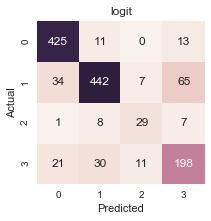

In [402]:
plot_confusion(logit.predict(X_test), "logit", y_test)

In [403]:
print(classification_report(le.inverse_transform(logit.predict(X_test)), 
                            le.inverse_transform(y_test)))

             precision    recall  f1-score   support

          0       0.95      0.88      0.91       481
          1       0.81      0.90      0.85       491
          2       0.64      0.62      0.63        47
          4       0.76      0.70      0.73       283

avg / total       0.84      0.84      0.84      1302



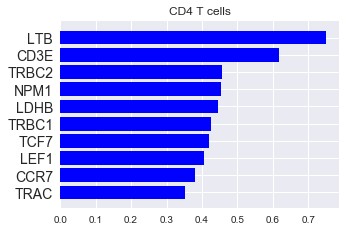

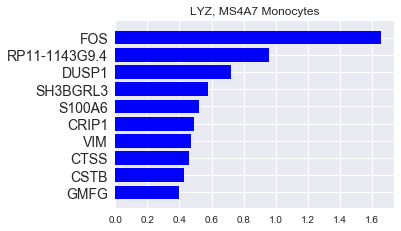

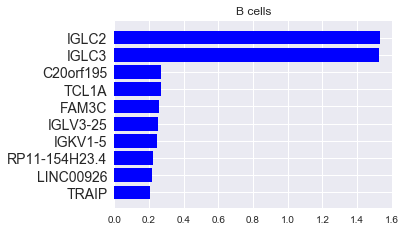

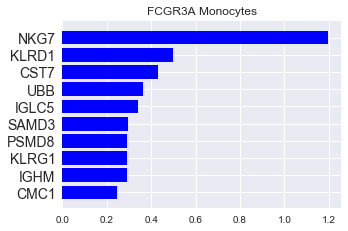

In [405]:
titles = ['CD4 T cells', 'LYZ, MS4A7 Monocytes', 'B cells', 'FCGR3A Monocytes']

def visualize_coefficients(coef, feature_names, title, plot_num, n_top_features=10):
    interesting_coefficients = np.argsort(coef)[-n_top_features:]
    
    plt.figure(figsize=(5, 20))
    plt.subplot(510+plot_num+1)
    colors = ["blue" for c in coef[interesting_coefficients]]
    plt.barh(np.arange(n_top_features), coef[interesting_coefficients], color=colors)
    feature_names = np.array(feature_names)
    plt.yticks(np.arange(0, 1 + n_top_features), 
               feature_names[interesting_coefficients], rotation=0, ha="right", fontsize=14);
    plt.title(title)

for i in range(4):
    visualize_coefficients(logit.coef_[i,:], FINAL.drop(["cluster"], axis=1).columns,
                      title=titles[i], plot_num=i)